<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Root_finding_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goals:
- Understand the nature of the root finding problem.
- Use standard tools for rootfinding of polynomials
- Understand bracketting root finding methods
- Understand open root finding methods

# Root finding

The roots (*aka zeros*) of a function are values of function arguments forwhich the function is zero:

Find $x$ such that:
$$ f(x) = 0 $$

It can become complicated when we consider vector $\vec{x}$ and even $\vec{f}$, which may seem complicated at first, but consider a special case of finding the roots of $\vec{f}(\vec{x})$ is our familiar linear system, $A \vec{x} -\vec{b} = \vec{0}$. This topic is mearly the generalization to nonlinear functions.


## Roots of some nonlinear functions

Let's build some intuition by exploring some type of roots in 1D functions using the *graphical method*: Plot the function and examine where it crosses the x-axis.

NB: Note the structure of the code below - Since we don't know *a priori* where the roots will be, we have to take a series of initial guesses and cross our finger....  and even then we may fail to find them all!

In [2]:
# prompt: Define a function that takes a function, plots it with xrange -10 to 10 and y range -10 to 10 with a line, solves for the roots using fsolve if the roots were found, plot them with dots
# NB: Modified from original output

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def plot_and_find_roots(func):
  """Plots a function and finds its roots using fsolve.

  Args:
    func: The function to plot and find roots for.
  """

  x = np.linspace(-10, 10, 400)
  y = func(x)

  plt.figure(figsize=(8, 6))
  plt.plot(x, y, label='f(x)')
  plt.axhline(y=0, color='black', linestyle='--')  # Plot the x-axis
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Plot of f(x) and its Roots')
  plt.xlim([-10, 10])
  plt.ylim([-10, 10])

  x0s = np.arange(-10,10,1)
  for x0 in x0s:
    r = root(func, x0=x0)
    if r.success:
      plt.plot(r.x, r.fun, 'ro', markersize=8)  # Plot root with a red dot
    plt.legend(['f(x)', 'Roots'])

  plt.grid(True)
  plt.show()

#### Example 1: Real roots - $x^2-4$

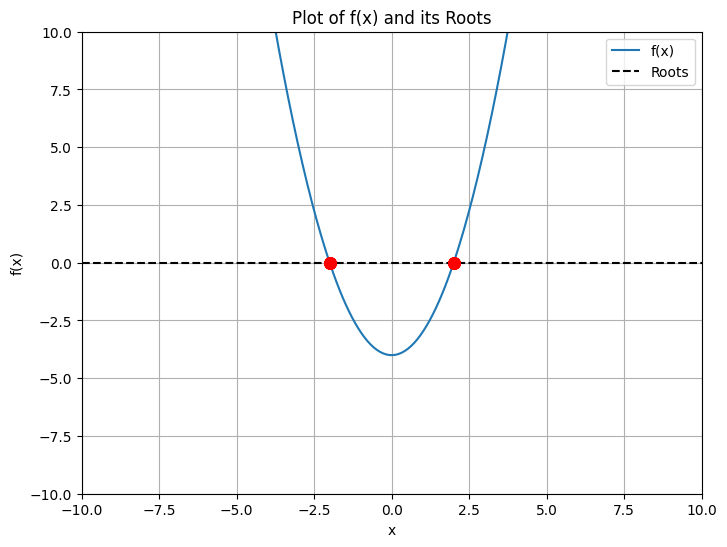

In [3]:
plot_and_find_roots(lambda x: x**2-4)

#### Example 2: No roots - $1/x$

<ipython-input-4-f7fd98d7a758>:1: RuntimeWarning: divide by zero encountered in divide
  plot_and_find_roots(lambda x: 1/x)


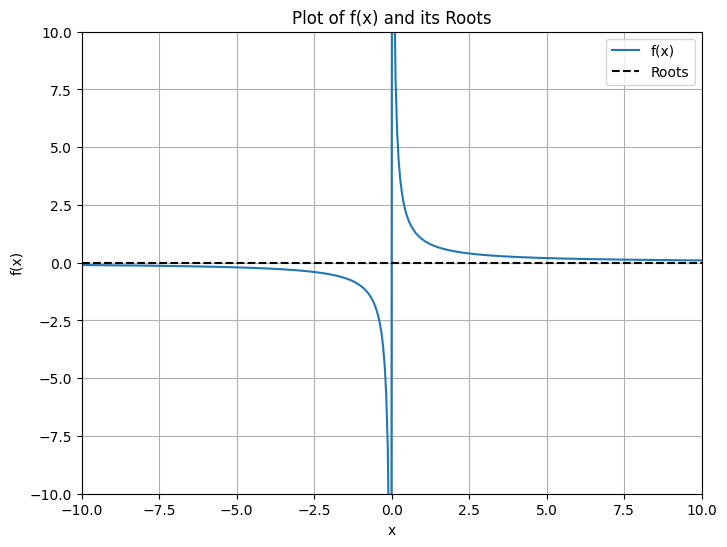

In [4]:
plot_and_find_roots(lambda x: 1/x)

Noting that the vertical line is a plotting artifact.

#### Example 3: Infinite roots $sin(x^2)$

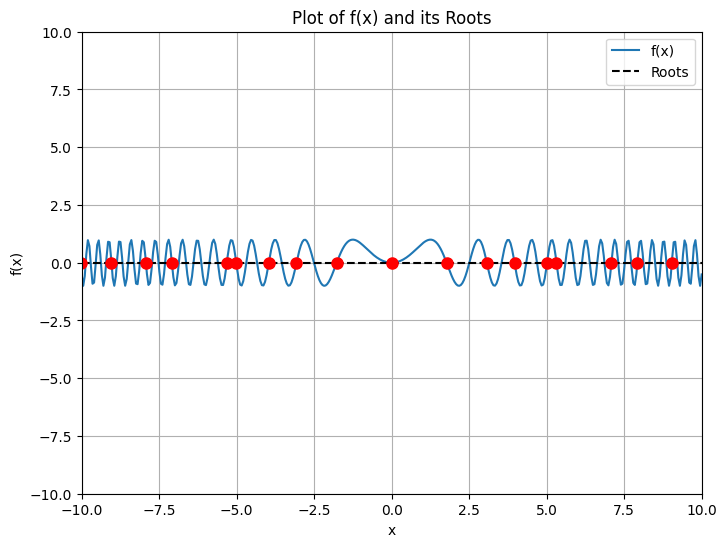

In [5]:
plot_and_find_roots(lambda x: np.sin(x**2))

Only the roots closest to the initial guesses are found!

## Complex roots - $x^2+1$

Even the graphical method is not completely reliable due to the existence of *complex roots*

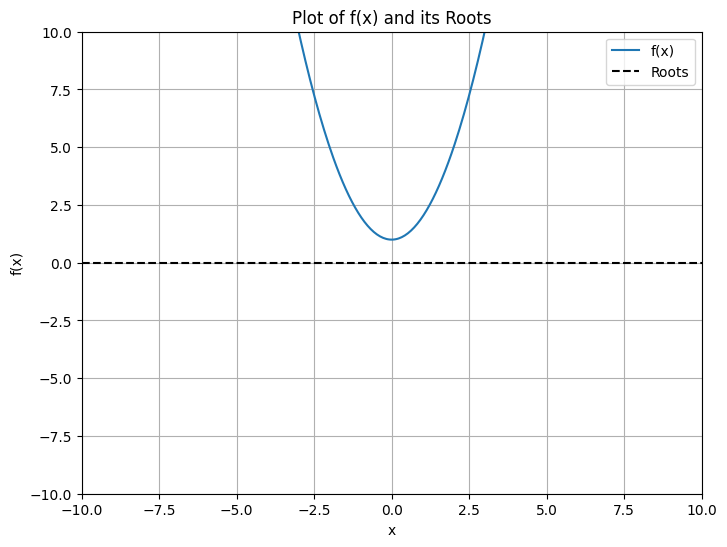

In [6]:
def fun(x):
  return x**2 + 1

# Wrong!
plot_and_find_roots(fun)

**But this is wrong!** The quadratic has 2 roots but we need to use a different method:

In [ ]:
root(lambda x: x**2+1, x0 = [1+1j, 1-1j], method = "krylov")

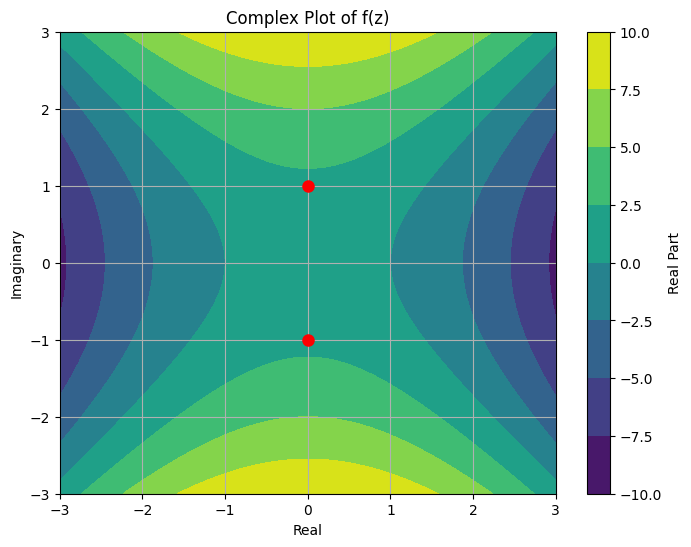

In [7]:
# prompt: Do a complex plot of x**2+1 and add points at the roots

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def complex_plot(func):
  """Plots a complex function and finds its roots using root.

  Args:
    func: The function to plot and find roots for.
  """

  real_range = np.linspace(-3, 3, 100)
  imag_range = np.linspace(-3, 3, 100)

  real_part = np.empty((len(real_range), len(imag_range)))
  imag_part = np.empty((len(real_range), len(imag_range)))

  for i, real in enumerate(real_range):
    for j, imag in enumerate(imag_range):
      z = complex(real, imag)
      result = func(z)
      real_part[i, j] = result.real
      imag_part[i, j] = result.imag

  plt.figure(figsize=(8, 6))
  plt.contourf(real_range, imag_range, real_part, cmap='viridis')
  plt.colorbar(label='Real Part')
  plt.xlabel('Real')
  plt.ylabel('Imaginary')
  plt.title('Complex Plot of f(z)')
  plt.grid(True)

  # Find roots and plot them
  r = root(lambda x: x**2 + 1, x0=[1 + 1j, 1 - 1j], method="krylov")
  if r.success:
    for root_val in r.x:
      plt.plot(root_val.real, root_val.imag, 'ro', markersize=8)  # Plot root with a red dot

  plt.show()


# Use the function to plot x**2 + 1
complex_plot(lambda z: z**2 + 1)


DON'T WORRY - We won't be dealing with complex numbers in general in this course :-)